# Lab 3.2: Detection

In [1]:
%matplotlib widget
import rad.example as ex
import rad.quiz as qz
from rad.const import c, k
from rad.radar import to_db, from_db, deg2rad, rad2deg
from math import sqrt, sin, asin, cos, acos, tan, atan2, pi, log, log10

**Reminders**: 

- Hit the *<font color="DarkBlue">Run All</font>* button <img width="18px" src="img/run_all_icon.png"> button above before continuing
- Useful formulae and definitions are available in [Reference](Reference.ipynb)

From [Lab 1.2: Introduction to Radar](1_2_Introduction_to_Radar.ipynb), we know that a *detection* is the acknowledgment that an echo of the transmitted wave has been received. When the noise energy of the radar system is comparable to the received energy from the echoes, making the right call is not trivial and requires the radar designer to guard against **false alarms**, i.e., incorrect declaration of the reception of an echo.

For our discussion, we will focus only on system noise as the source of false alarms; however, false alarms can arise from unwanted energy being received via other means:

- **Clutter**: echoes of background or uninteresting objects, e.g., buildings, sea surface
- **Interference**: signals generated by other sources, e.g., cell phone towers, other radar systems

Before getting to detection methods, let us first review signal-to-noise ratio.

## Review: Signal-to-Noise Ratio (SNR)

In [Lab 1.2: Introduction to Radar](1_2_Introduction_to_Radar.ipynb), we learned that the relative strength of an echo versus the system noise is quantified using a *signal-to-noise ratio* (SNR). Large values of SNR ($\gg 0~\mathrm{dB}$) should facilitate confident formation of a detection whereas low values of SNR ($\leq 0~\mathrm{dB}$) will make correct declaration of a detection difficult. Recalling a previous interactive example, we can see how radar and target parameters affect the SNR and how that intuitively affects the acknowledgment of an echo (plotted in **black**) in the presence of noise (plotted in **<font color="red">red</font>**):

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Radar</b>"), FloatSlider(value=400.0, desc…

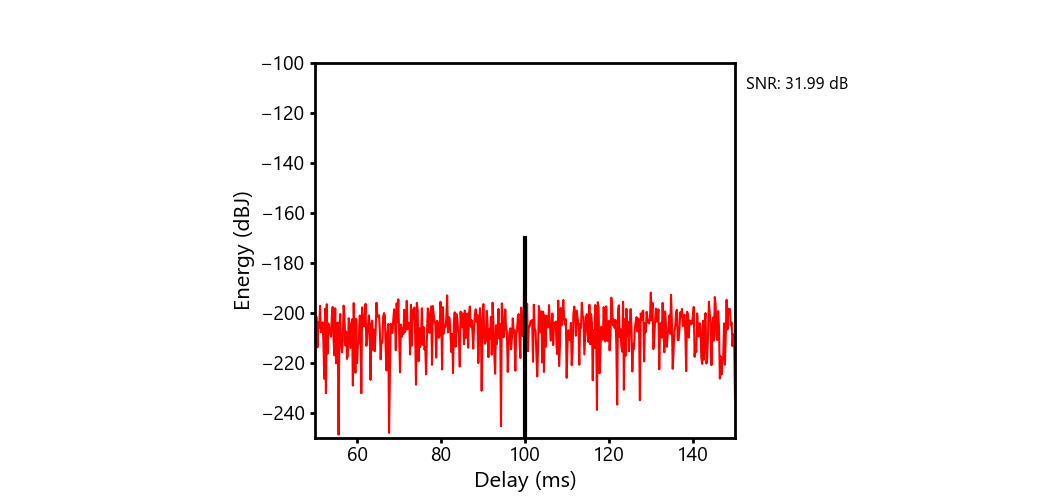

In [2]:
ex.ex_3_2_1()

In reality, we will not have the benefit of having the true echo labeled with a different color, and it is our objective to discern which parts of the signal are detections; the practical problem looks more like the following example:

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Radar</b>"), FloatSlider(value=400.0, desc…

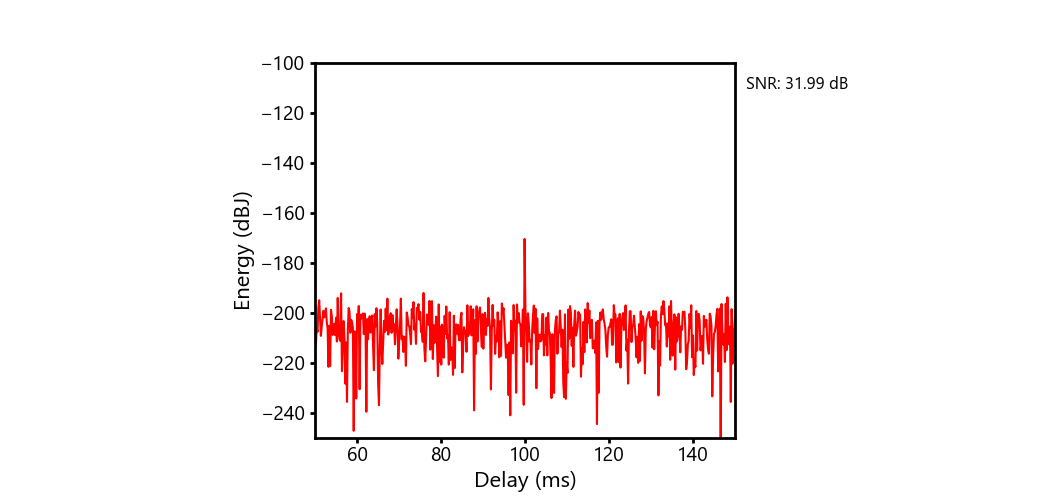

In [3]:
ex.ex_3_2_2()

We can note that at SNR values near or below zero, the target echo is indistinguishable from the noise.

## Detection Theory

The academic area concerned with finding the presence of a signal within noise is **detection theory**. In this field, we try to develop detection rules that will successfully designate data points as being a detection or not. Before we can create a "good" detection rule (called a **detector**), we have to define some ways to  quantify success.

When labeling a data point as a detection or not, some of the possible outcomes have been given special names, as listed below:

#### Possible Outcomes

| Category                 | Status   | Description                                                            |
|--------------------------|----------|------------------------------------------------------------------------|
| Detection                | &#10004; | **Correctly** declaring a true echo as an echo                         |
| Miss                     | &#10060; | **Erroneously** remain silent though a true echo is actually present   |
| False Alarm              | &#10060; | **Erroneously** declaring noise as an echo                             |
| Correct Rejection        | &#10004; | **Correctly** staying silent when only noise is present                |

If we take each of these cases and divide them by the total number of correct opportunities, the resulting rates define our accuracy or lack thereof. For instance, if we had data points that contained 100 true echoes and declared detections on only 50, we would have a **probability of detection** of $P_D = 50/100 = 0.5$. Likewise, if we have 100 data points that contain only noise and we incorrectly declare 25 of them to have echoes, we have a **probability of false alarm** of $P_{FA} = 25/100 = 0.25$. To summarize these measures, we have the following table:

#### Accuracy Measures
| Category                   | Symbol             | Formula                                                          |
|----------------------------|--------------------|------------------------------------------------------------------|
| Probability of Detection   | $P_D$              | $\frac{\sum{\mathrm{Detections}}}{\sum{\mathrm{True~Echoes}}}$   |
| Probability of False Alarm | $P_{FA}$           | $\frac{\sum{\mathrm{False~Alarms}}}{\sum{\mathrm{Noise~Only}}}$   |

$P_D$ and $P_{FA}$ fully describe the performance of a detector<sup>[1](#foot_pdpfa)</sup> and their simultaneous representation will prove so definitive that a special form of graph of the two used to illustrate system performance.  However, before we examine that graph, let us further study how $P_D$ and $P_{FA}$ are calculated by looking at interactive example.

We are now going to look at a sequence of data samples (shown now as bars) and decide which are echoes and which are just noise. Choose the expected *<font color=DarkBlue>Target SNR</font>* to use for the game, then hit *<font color=DarkBlue>Start</font>* (once the game is started, we can no longer change the *<font color=DarkBlue>Target SNR</font>*). For the current data point (thick **black** line), select *<font color=DarkBlue>Detection</font>* or *<font color=DarkBlue>No Detection</font>*; note that the target echoes will show up near *<font color=DarkBlue>Target SNR</font>* and noise will show up near $0~\mathrm{dB}$. For each answer, the result will be color coded as **<font color="DarkGreen">green</font>** for a correct detection, **<font color="Blue">blue</font>** for a correct rejection, **<font color="red">red</font>** for a false alarm, and **<font color="magenta">magenta</font>** for a missed detection. The running values for $P_D$ and $P_{FA}$ will be displayed to the right of the plot.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Game</b>"), Button(description='Start', st…

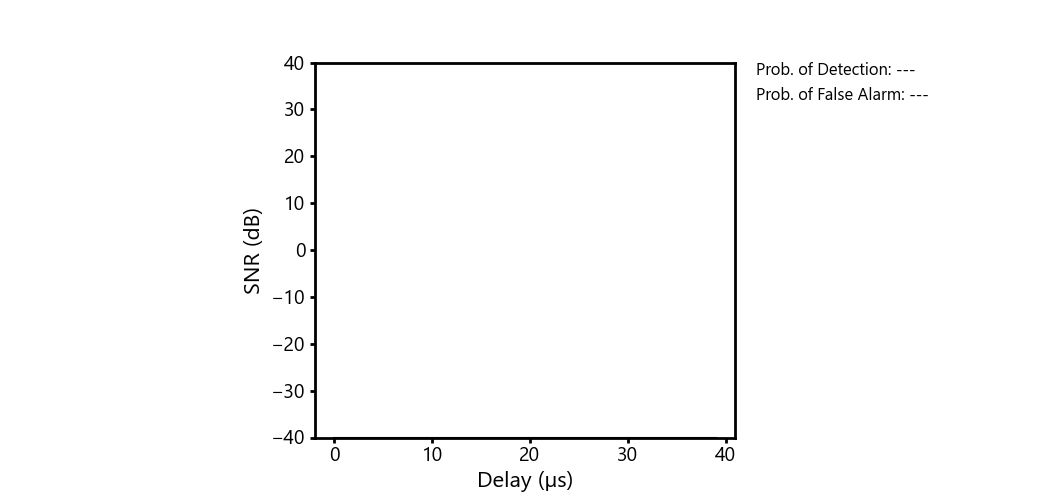

In [4]:
ex.ex_3_2_3()

Note that perfect detector would have a probability of detection of $P_D = 1$ and a probability of false alarm of $P_{FA} = 0$.

What determined which data points were called detections?  A reasonable strategy was to define some threshold energy then declare everything above that as a detection and everything below that as noise.  This is not a bad strategy, but if we were to play the game that way under different noise levels, the threshold would need to be adjusted accordingly.  You can see that in the next exercise.  Moreover, we will notice how you need to choose which of the error types&mdash;false alarms or misses&mdash;are most important to you.

In the following interactive example, we will now set a constant threshold where: (i) data values above are declared detections, (ii) data values below are labelled as no detection. Try moving the *<font color=DarkBlue>Threshold</font>* around to see how close you can get to a probability of detection of $P_D = 1$ and a probability of false alarm of $P_{FA} = 0$. Additionally, we can change the *<font color=DarkBlue>SNR</font>* and then create a new set of data using the *<font color=DarkBlue>New</font>* button. Results are colored the same way as the last interactive example.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Data</b>"), Button(description='New', styl…

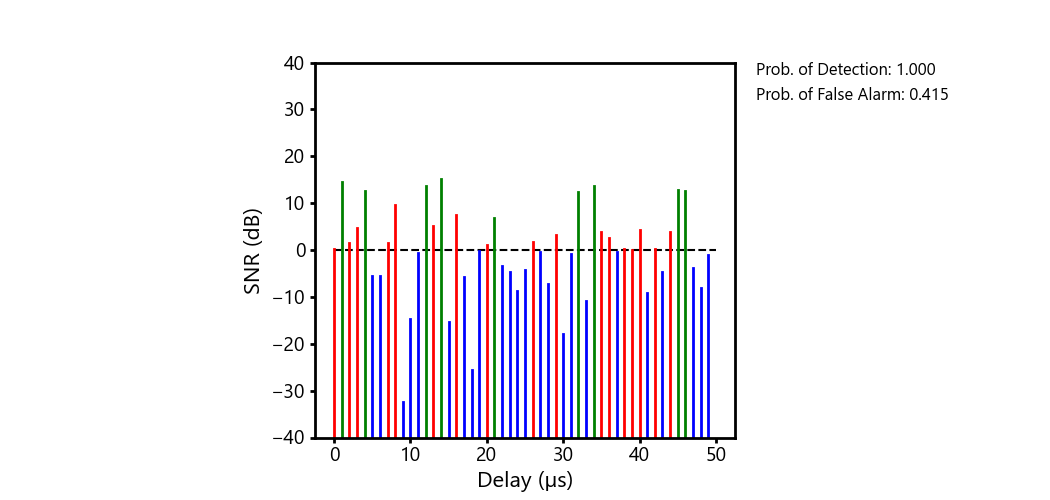

In [5]:
ex.ex_3_2_4()

We can notice that at high SNR values ($20-30~\mathrm{dB}$), finding a good threshold value is easy as there is a large separation between the echo energies and the noise energies. As the SNR decreases, however, there is usually no way to achieve a perfect probability of detection and probability of false alarm; in fact, we have to design the threshold to tradeoff a number of false alarms for a number of missed detections. This is the typical trade encountered when designing detectors, and it summarized using a **receiver operating characteristic** (ROC) curve.

A ROC curve shows how $P_D$ and $P_{FA}$ evolve as the threshold is changed. In the interactive example below, we can see a ROC curve<sup>[2](#foot_roc)</sup> with a variable SNR.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Controls</b>"), FloatSlider(value=10.0, de…

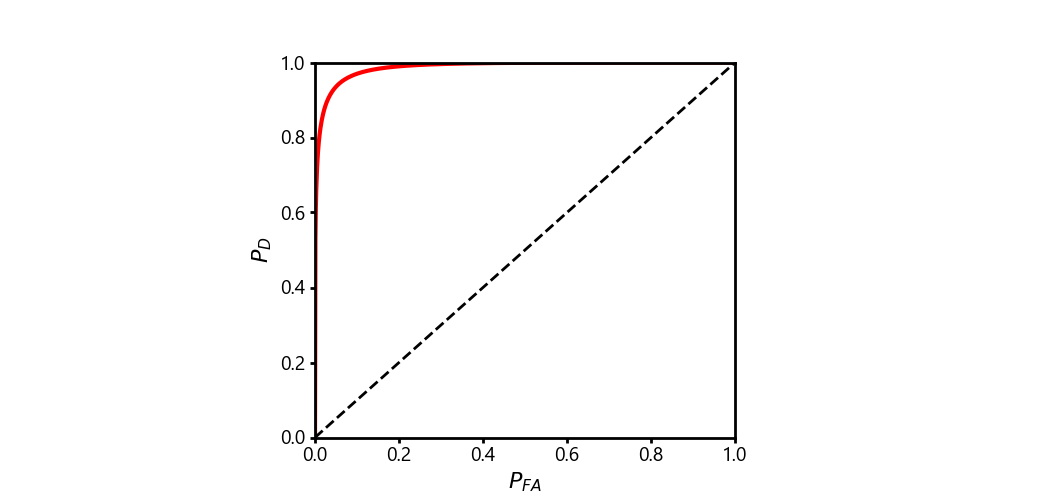

In [6]:
ex.ex_3_2_5()

Each point on the ROC curve corresponds to a unique threshold value; thus, this curve tells us what probability of detection, $P_{D}$ , can be obtained at a given probability of false alarm, $P_{FA}$. As the SNR increases, the $P_D$ rises more sharply with increasing $P_{FA}$ meaning that we can get better $P_D$ for the same amount of false alarms with a lower SNR. A perfect detector will $P_D = 1$ for all values of $P_{FA}$ , and a random detector (worst case; uses no information from the data) follows the **black** dashed line.

***

### Question 1

**(a)** What $P_D$ is obtained when $P_{FA} = 0.1$ and the SNR is $\mathrm{SNR} = 5~\mathrm{dB}$?

In [7]:
qz.quiz_3_2_1a()

In [8]:
# Scratch space

**(b)** What $P_{FA}$ is required to achieve a $P_{D} = 0.9$ and the SNR is $\mathrm{SNR} = 7~\mathrm{dB}$?

In [9]:
qz.quiz_3_2_1b()

In [10]:
# Scratch space

***

Note that the detection analysis we have done so far assumes that we know something about the average noise energy, $\mathcal{E}_n$ , which affects the SNR. In real systems, this value may vary depend due to many environmental variables, e.g., outside temperature. There is a commonly-used detector class called **constant false-alarm rate** (CFAR) detectors that continuously estimates average noise energy to ensure that the threshold is being adapted to the current noise characteristics.

## Robby Revisited

To finish this lab, we will revisit Robby the radar system, except now we can create detections by selecting a constant threshold. In the interactive example below, detections are shown as white dots overlayed on top of the radar display. Try changing the *<font color=DarkBlue>Threshold</font>* to see how the number of detections and false alarms evolves.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Radar</b>"), FloatSlider(value=1000.0, des…

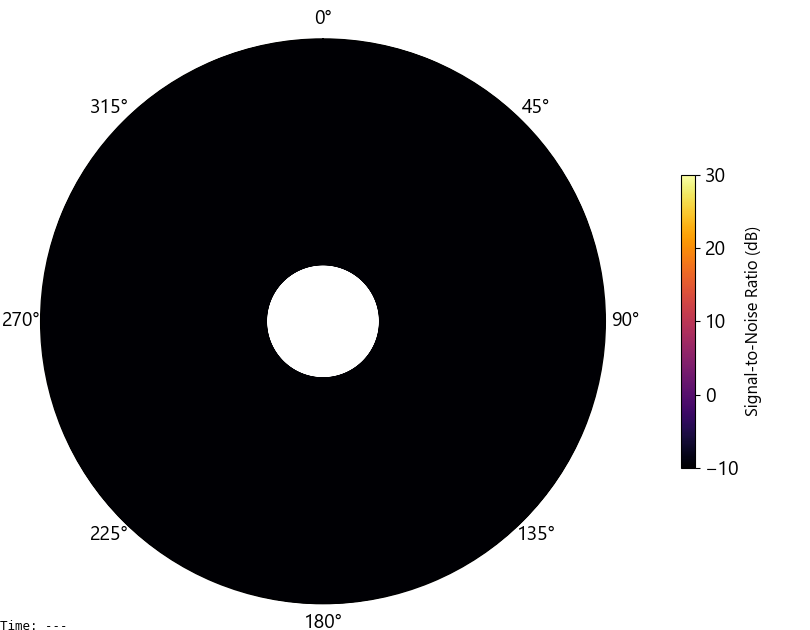

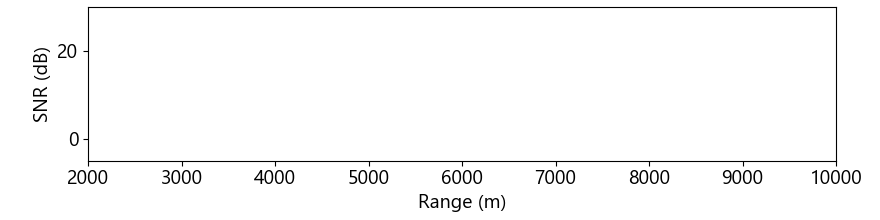

In [11]:
ex.ex_3_2_6()

In [Lab 4.2: Target Tracking](4_2_Target_Tracking.ipynb), we will see the importance of properly balancing detections and false alarms.

## Summary

In this lab, we discussed how SNR relates to the relative detectability of a target echo. Further, the field of creating detection rules, or detectors, is known as detection theory. In this, we make formal definitions of success and failure, e.g., detection, false alarm, miss, and use these to design a constant threshold detector. For most applications, a tradeoff is encountered between detections and false alarms; this tradeoff is best illustrated using a receiver operating characteristic (ROC) curve. Finally, we looked the impact of a constant threshold detector on the output of Robby.

## Footnotes

<a id="foot_pdpfa"><sup>1</sup></a>Probability of miss is simply $1 - P_D$ and probability of correct rejection is $1 - P_{FA}$.

<a id="foot_roc"><sup>2</sup></a>This ROC curve assumes that the system noise follows a Gaussian distribution. See Section 3.4 of [[1]](#ref_key).

## References

<a id="ref_kay">[1]</a> S. M. Kay, *Fundamentals of Statistical Signal Processing: Detection Theory*. Prentice Hall,1993